<a href="https://colab.research.google.com/github/fralfaro/MAT306/blob/main/docs/labs/lab_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# MAT306 - Laboratorio N°02

**Objetivos del Laboratorio 2**

* Reforzar el uso de la librería **NumPy** para el manejo y procesamiento eficiente de datos numéricos.
* Aplicar operaciones vectorizadas y funciones matemáticas de NumPy en contextos reales.
* Comprender la implementación de un modelo de **regresión lineal simple** utilizando arrays de NumPy.
* Interpretar los resultados obtenidos a partir del modelo ajustado.



## Problema 01 — Introducción a la regresión lineal simple

El objetivo de este laboratorio es implementar y analizar un modelo de **regresión lineal simple**, utilizando operaciones vectorizadas con **NumPy**.

### Definición general

El modelo de **regresión lineal múltiple** se expresa como:

$$
\boldsymbol{Y} = \boldsymbol{X} \boldsymbol{\beta} + \boldsymbol{\epsilon}
$$

donde:

* $\boldsymbol{X} = (x_1, \dots, x_n)^\top$: variable explicativa (matriz de diseño).
* $\boldsymbol{Y} = (y_1, \dots, y_n)^\top$: variable respuesta.
* $\boldsymbol{\epsilon} = (\epsilon_1, \dots, \epsilon_n)^\top$: término de error, asumido como ruido blanco: $\epsilon \sim \mathcal{N}(0, \sigma^2 I)$.
* $\boldsymbol{\beta} = (\beta_0, \beta_1, \dots, \beta_p)^\top$: coeficientes del modelo.

En el caso particular de la **regresión lineal simple**, se modela una única variable explicativa $x$ y una respuesta $y$, mediante la relación:

$$
y_i = \beta_0 + \beta_1 x_i + \epsilon_i
$$

El objetivo es encontrar los valores de $\beta_0$ y $\beta_1$ que ajusten una recta a los datos observados, minimizando la diferencia entre los valores reales $y_i$ y los valores predichos $\hat{y}_i$.

<div align="center">
<img src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="500"/>
</div>


### ¿Cuándo un modelo lineal no es adecuado?

Existen situaciones en las que los modelos lineales no entregan buenos resultados, por ejemplo:

* Cuando el rango de valores de $Y$ está restringido (como en variables binarias o de conteo).
* Cuando la varianza de $Y$ no es constante y depende de su media (heterocedasticidad).




### Estimación de parámetros: Método de mínimos cuadrados

El **método de mínimos cuadrados** es una técnica de optimización que permite encontrar los parámetros que mejor ajustan un modelo a los datos, minimizando la suma de los errores al cuadrado. Formalmente, el problema consiste en resolver:

$$
(P) \quad \min \sum_{i=1}^n e_i^2 = \sum_{i=1}^n (y_i - f_i(x; \beta))^2
$$

En el caso de la **regresión lineal simple**, se busca ajustar una función de la forma:

$$
f(x; \beta) = \beta_0 + \beta_1 x
$$

Por lo tanto, el problema de optimización se convierte en:

$$
(P) \quad \min \sum_{i=1}^n \left( y_i - (\beta_0 + \beta_1 x_i) \right)^2
$$

El objetivo es encontrar los coeficientes $\beta = (\beta_0, \beta_1)$ que minimicen esta suma.

La solución analítica del problema se obtiene a partir de derivadas parciales y está dada por:

$$
\hat{\beta}_1 = \dfrac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}
\quad , \quad
\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}
$$

La pendiente $\hat{\beta}_1$ también puede interpretarse como la correlación lineal escalada entre $x$ y $y$.






### Selección de modelos — Coeficiente de determinación ($R^2$)

El [coeficiente de determinación](https://en.wikipedia.org/wiki/Coefficient_of_determination), comúnmente conocido como **$R^2$**, es un estadístico utilizado para evaluar la calidad de ajuste de un modelo estadístico, especialmente en regresión lineal.

Su principal propósito es medir qué tan bien el modelo logra explicar la variabilidad observada en la variable respuesta. Es decir, indica la **proporción de la variación total de $y$** que puede ser explicada por el modelo.

El valor de $R^2$ está acotado entre 0 y 1:

* Un valor cercano a **0** sugiere que el modelo **no explica bien los datos**.
* Un valor cercano a **1** indica que el modelo **ajusta muy bien los datos** observados.



### Fórmula

$$
R^2 = \dfrac{SS_{\text{reg}}}{SS_{\text{tot}}} = 1 - \dfrac{SS_{\text{res}}}{SS_{\text{tot}}}
$$

donde:

* $SS_{\text{reg}}$: **Suma de cuadrados explicada (ESS)**

  $$
  SS_{\text{reg}} = \sum_{i=1}^n (\hat{y}_i - \bar{y})^2
  $$

* $SS_{\text{res}}$: **Suma de cuadrados residual (RSS)**

  $$
  SS_{\text{res}} = \sum_{i=1}^n (y_i - \hat{y}_i)^2 = \sum_{i=1}^n e_i^2
  $$

* $SS_{\text{tot}}$: **Suma total de cuadrados (TSS)**

  $$
  SS_{\text{tot}} = \sum_{i=1}^n (y_i - \bar{y})^2
  $$

Se cumple que:

$$
SS_{\text{tot}} = SS_{\text{reg}} + SS_{\text{res}}
$$



### Interpretación

El coeficiente $R^2$ está relacionado con la **fracción de varianza no explicada** (FVU). Cuanto menor sea el error residual (RSS), mayor será $R^2$, y mejor será el ajuste del modelo.



<div align="center">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/86/Coefficient_of_Determination.svg/600px-Coefficient_of_Determination.svg.png" width="500"/>
</div>

* Las áreas **azules** representan los residuos al cuadrado respecto a la **media** ($SS_{\text{tot}}$).
* Las áreas **rojas** representan los residuos al cuadrado respecto a la **regresión** ($SS_{\text{res}}$).




Claro, aquí tienes una versión mejorada del texto sobre el **error del modelo**, con redacción más clara, precisión conceptual, ortografía corregida y mejor organización visual:



## Evaluación del error en un modelo

### Definición

El **error** de un modelo corresponde a la diferencia entre el valor real observado y el valor estimado por el modelo. Se define como:

$$
e_i = y_i - \hat{y}_i
$$

donde $y_i$ es el valor real y $\hat{y}_i$ el valor predicho para el dato $i$.

<div align="center">
<img src="https://allmodelsarewrong.github.io/images/ols/ols-geom-obs3.svg" width="500"/>
</div>



### ¿Cómo se mide el error?

Para evaluar qué tan bien se ajusta un modelo a los datos, se utilizan **métricas de error** o **funciones de pérdida**. Estas métricas cuantifican el grado de desviación entre las predicciones y los valores reales. A continuación se presentan las más comunes, divididas en dos categorías:



### 1. Métricas absolutas

Las métricas absolutas miden el error en la misma escala que los datos, sin realizar normalización. Son útiles cuando la escala del problema es conocida y relevante.

* **Error absoluto medio (MAE)**

$$
\text{MAE}(y, \hat{y}) = \dfrac{1}{n} \sum_{t=1}^{n} \left| y_t - \hat{y}_t \right|
$$

* **Error cuadrático medio (MSE)**

$$
\text{MSE}(y, \hat{y}) = \dfrac{1}{n} \sum_{t=1}^{n} \left( y_t - \hat{y}_t \right)^2
$$

Estas métricas penalizan los errores de distinta forma: el MSE penaliza más los errores grandes, mientras que el MAE es más robusto ante valores atípicos.



### 2. Métricas porcentuales

Las métricas porcentuales escalan el error en relación al valor real, permitiendo comparar modelos o datos en distintas unidades o magnitudes. Aunque están acotadas en teoría entre 0 y 1, en la práctica pueden superar el 1 (especialmente cuando los valores reales son pequeños).

* **Error porcentual absoluto medio (MAPE)**

$$
\text{MAPE}(y, \hat{y}) = \dfrac{1}{n} \sum_{t=1}^{n} \left| \frac{y_t - \hat{y}_t}{y_t} \right|
$$

* **Error porcentual absoluto medio simétrico (sMAPE)**

$$
\text{sMAPE}(y, \hat{y}) = \dfrac{1}{n} \sum_{t=1}^{n} \frac{\left| y_t - \hat{y}_t \right|}{\left( \left| y_t \right| + \left| \hat{y}_t \right| \right)/2}
$$

> Nota: El sMAPE evita algunos problemas del MAPE cuando los valores reales se acercan a cero.








## Problema a resolver

En este ejercicio trabajaremos con un conjunto de datos que relaciona los **años de experiencia laboral** con el **salario anual** de distintas personas.

El objetivo es construir un modelo de **regresión lineal simple** que permita predecir el salario en función de los años de experiencia, y utilizar **NumPy** para realizar todas las operaciones necesarias.

El conjunto de datos contiene dos columnas:

* `YearsExperience`: cantidad de años de experiencia laboral (variable explicativa o independiente).
* `Salary`: salario anual (variable de respuesta o dependiente).

A continuación, se presenta explícitamente el conjunto de datos.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

YearsExperience = np.array([
 1.1,1.3,1.5,2.0,2.2,
 2.9,3.0,3.2,3.2,3.7,
 3.9,4.0,4.0,4.1,4.5,
 4.9,5.1,5.3,5.9,6.0,
 6.8,7.1,7.9,8.2,8.7,
 9.0,9.5,9.6,10.3,10.5
 ])

Salary =  np.array([
 39343.0,46205.0,37731.0,43525.0,39891.0,
 56642.0,60150.0,54445.0,64445.0,57189.0,
 63218.0,55794.0,56957.0,57081.0,61111.0,
 67938.0,66029.0,83088.0,81363.0,93940.0,
 91738.0,98273.0,101302.0,113812.0,109431.0,
 105582.0,116969.0,112635.0,122391.0,121872.0
])



Nuestro objetivo es encontrar un modelo de **regresión lineal simple** que relacione el salario con los años de experiencia. El modelo a ajustar tiene la siguiente forma:

$$
Salary_i = \beta_0 + \beta_1 \cdot YearsExperience_i + \epsilon_i
$$

donde:

* $Salary_i$ es el salario observado para la persona $i$,
* $YearsExperience_i$ representa los años de experiencia,
* $\beta_0$ es el intercepto del modelo,
* $\beta_1$ es la pendiente o coeficiente de regresión, y
* $\epsilon_i$ es el error aleatorio asociado a la observación $i$.

A continuación, deberás resolver las siguientes preguntas para construir, ajustar y evaluar el modelo utilizando **NumPy**.



**1. Estimación de coeficientes**

Define una función llamada `estimate_coef(x, y)` que reciba dos arreglos de NumPy:

* `x`: variable explicativa (años de experiencia),
* `y`: variable de respuesta (salario),

y retorne una tupla con los coeficientes estimados de la regresión lineal simple $(b_0, b_1)$, donde:

$$
b_1 = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}, \quad
b_0 = \bar{y} - b_1 \cdot \bar{x}
$$


In [2]:
def estimate_coef(x, y):
    
    x_prom = np.mean(x)
    y_prom = np.mean(y)

    beta_1 = (np.sum((x-x_prom)*(y-y_prom)))/np.sum((x-x_prom)**2)
    beta_0 = y_prom - beta_1*x_prom

    return (beta_0, beta_1)

In [3]:
# imprimir valores del beta estimado
beta_estimado = estimate_coef(YearsExperience, Salary)
print(f"Coeficientes estimados:\nb_0 = {beta_estimado[0]} \nb_1 = {beta_estimado[1]}")

Coeficientes estimados:
b_0 = 25792.20019866869 
b_1 = 9449.962321455077




**2. Visualización del modelo ajustado**

Utiliza la función `plot_regression_line(x, y, yhat)` para graficar los datos observados junto con la recta de regresión obtenida.

* `x`: valores de la variable explicativa (años de experiencia),
* `y`: valores observados de la variable de respuesta (salario),
* `yhat`: valores predichos por el modelo lineal, calculados como $\hat{y} = b_0 + b_1 x$

La gráfica debe incluir:

* Un diagrama de dispersión con los puntos observados $(x_i, y_i)$,
* La recta de regresión que representa el modelo ajustado.



In [4]:
def plot_regression_line(x, y, yhat):
    
    plt.figure(figsize=(10,4))
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "blue",marker = "o", s = 30, label="Datos reales")


    # plotting the regression line
    plt.plot(x, yhat, color = "red", label="Prediccion")

    # putting labels
    plt.xlabel('Años de experiencia')
    plt.ylabel('Salario')
    plt.title("Grafico Años de experiencia vs Salario")

    # function to show plot
    plt.legend()
    plt.show()

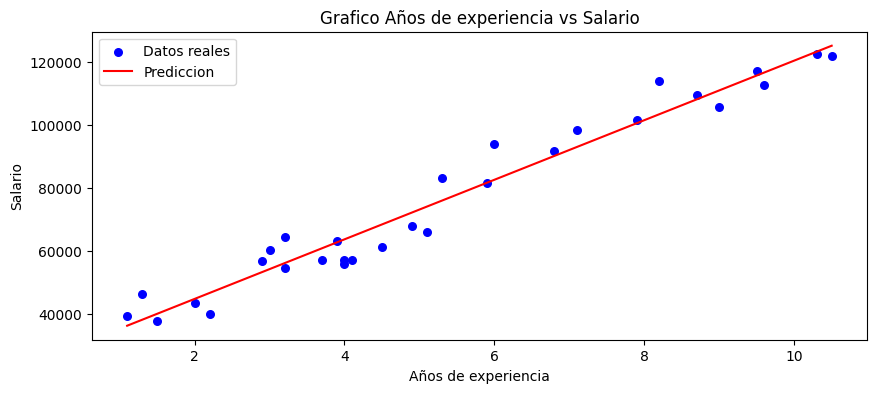

In [5]:
# mostrar resultados del ajuste lineal
prediccion = beta_estimado[0] + beta_estimado[1]*YearsExperience
plot_regression_line(YearsExperience, Salary, prediccion)



**3. Evaluación cuantitativa del modelo**

Utiliza los valores reales (`y`) y los valores predichos por el modelo (`yhat`) para calcular diversas métricas que cuantifican el error y la calidad del ajuste.

Debes definir e implementar las siguientes funciones:

* `mae(y, yhat)`: **Error absoluto medio**

  $$
  \text{MAE} = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|
  $$

* `rmse(y, yhat)`: **Raíz del error cuadrático medio**

  $$
  \text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 }
  $$

* `mape(y, yhat)`: **Error porcentual absoluto medio**

  $$
  \text{MAPE} = \frac{1}{n} \sum_{i=1}^n \left| \frac{y_i - \hat{y}_i}{y_i} \right|
  $$

* `smape(y, yhat)`: **Error porcentual absoluto medio simétrico**

  $$
  \text{sMAPE} = \frac{1}{n} \sum_{i=1}^n \frac{ |y_i - \hat{y}_i| }{ (|y_i| + |\hat{y}_i|)/2 }
  $$

* `rsquared(y, yhat)`: **Coeficiente de determinación $R^2$**

  $$
  R^2 = 1 - \frac{ \sum_{i=1}^n (y_i - \hat{y}_i)^2 }{ \sum_{i=1}^n (y_i - \bar{y})^2 }
  $$


In [6]:
def mae(y, yhat) -> float:
    
    metrica = np.mean(np.abs(y-yhat))

    return metrica

In [7]:
def rmse(y, yhat) -> float:
    
    metrica = np.sqrt(np.mean((y-yhat)**2))
    
    return metrica

In [8]:
def mape(y, yhat) -> float:

    metrica = np.mean(np.abs((y-yhat)/y))

    return metrica

In [9]:
def smape(y, yhat) -> float:
    
    metrica = 2*np.mean(np.abs((y-yhat)/(np.abs(y)+np.abs(yhat))))

    return metrica

In [13]:
def rsquared(y, yhat) -> float:

    metrica = 1-(np.sum(((y-yhat)**2))/np.sum(((y-np.mean(y))**2)))

    return metrica

In [15]:
# calcular resultados
calcular_mae = round(mae(Salary,prediccion), 4)
calcular_rmse = round(rmse(Salary,prediccion), 4)
calcular_mape = round(mape(Salary,prediccion), 4)
calcular_smape = round(smape(Salary,prediccion), 4)
calcular_rsquared = round(rsquared(Salary,prediccion), 4)

In [16]:
# imprimir resultados
print(f"mae:   {calcular_mae}")
print(f"rmse:  {calcular_rmse}")
print(f"mape:  {calcular_mape}")
print(f"smape: {calcular_smape}")
print(f"r^2:   {calcular_rsquared}")

mae:   4644.2013
rmse:  5592.0436
mape:  0.0705
smape: 0.0704
r^2:   0.957



**4. Análisis de resultados y conclusiones**

Con base en las métricas obtenidas, realiza una reflexión final sobre el desempeño del modelo.
Evalúa si la **regresión lineal simple** proporciona un buen ajuste para los datos observados. Para ello, considera lo siguiente:

* ¿El valor de $R^2$ indica una alta capacidad explicativa del modelo?
* ¿Los errores (MAE, RMSE, MAPE, sMAPE) son bajos en relación al rango de los salarios?
* ¿Hay patrones evidentes en los errores que sugieran que un modelo lineal no es adecuado?

Redacta tus conclusiones de forma clara, justificando si el modelo de regresión lineal es apropiado o si podrían considerarse otras alternativas.


El modelo de regresión lineal simple presenta un coeficiente de determinación r^2 = 0.957, lo que indica que el 95.7% de la variabilidad en los salarios se explica por los años de experiencia, reflejando una capacidad explicativa muy alta. (y una relación lineal clara entre ambas variables)

En cuanto a los errores, se obtuvo un MAE de aproximadamente 4,644, un RMSE cercano a 5,592, y métricas porcentuales como el MAPE y el SMAPE en torno al 7%, valores que resultan bajos en relación al rango de los salarios, lo que implica que el modelo logra predecir con bastante precisión el salario a partir de la experiencia laboral.

Además, al analizar los residuos, no se observan patrones que sugieran problemas, por lo que no existen indicios de que un modelo lineal sea inadecuado para este conjunto de datos. Es decir, el modelo se ajusta de manera muy satisfactoria, con un buen nivel predictivo y una interpretación simple y coherente.

**Respuesta**:

